# Hill climbing the test set for a classification task

Credits: Jason Brownlee, Machine Learning Mastery blog

In [1]:
# imports
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# load or prepare the classification dataset
def load_dataset():
    return make_classification(n_samples=5000, 
                               n_features=20, 
                               n_informative=15, 
                               n_redundant=5, 
                               random_state=1)

In [3]:
# evaluate a set of predictions
def evaluate_predictions(y_test, yhat):
    return accuracy_score(y_test, yhat)

In [4]:
# create a random set of predictions
def random_predictions(n_examples):
    return [random.randint(0, 1) for _ in range(n_examples)]

In [5]:
# modify the current set of predictions
def modify_predictions(current, n_changes=1):
    # copy current solution
    updated = current.copy()
    for i in range(n_changes):
        # select a point to change
        ix = random.randint(0, len(updated)-1)
        # flip the class label
        updated[ix] = 1 - updated[ix]
    return updated

In [6]:
# run a hill climb for a set of predictions
def hill_climb_testset(X_test, y_test, max_iterations):
    scores = list()
    # generate the initial solution
    solution = random_predictions(X_test.shape[0])
    # evaluate the initial solution
    score = evaluate_predictions(y_test, solution)
    scores.append(score)
    # hill climb to a solution
    for i in range(max_iterations):
        # record scores
        scores.append(score)
        # stop once we achieve the best score
        if score == 1.0:
            break
        # generate new candidate
        candidate = modify_predictions(solution)
        # evaluate candidate
        value = evaluate_predictions(y_test, candidate)
        # check if it is as good or better
        if value >= score:
            solution, score = candidate, value
            print('>%d, score=%.3f' % (i, score))
    return solution, scores

In [7]:
# load the dataset
X, y = load_dataset()
print(X.shape, y.shape)

(5000, 20) (5000,)


In [8]:
# split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3350, 20) (1650, 20) (3350,) (1650,)


In [9]:
# run hill climb
yhat, scores = hill_climb_testset(X_test, y_test, 20000)

>3, score=0.498
>5, score=0.498
>7, score=0.499
>8, score=0.499
>12, score=0.500
>13, score=0.501
>14, score=0.501
>20, score=0.502
>24, score=0.502
>25, score=0.503
>26, score=0.504
>27, score=0.504
>28, score=0.505
>30, score=0.505
>31, score=0.506
>33, score=0.507
>36, score=0.507
>37, score=0.508
>41, score=0.508
>42, score=0.509
>46, score=0.510
>51, score=0.510
>53, score=0.511
>55, score=0.512
>60, score=0.512
>62, score=0.513
>63, score=0.513
>64, score=0.514
>66, score=0.515
>67, score=0.515
>68, score=0.516
>74, score=0.516
>75, score=0.517
>77, score=0.518
>78, score=0.518
>82, score=0.519
>84, score=0.519
>86, score=0.520
>87, score=0.521
>93, score=0.521
>95, score=0.522
>102, score=0.522
>103, score=0.523
>104, score=0.524
>106, score=0.524
>107, score=0.525
>109, score=0.525
>110, score=0.526
>111, score=0.527
>114, score=0.527
>115, score=0.528
>116, score=0.528
>121, score=0.529
>127, score=0.530
>131, score=0.530
>132, score=0.531
>133, score=0.532
>134, score=0.532
>

>1349, score=0.779
>1352, score=0.779
>1359, score=0.780
>1361, score=0.781
>1362, score=0.781
>1366, score=0.782
>1367, score=0.782
>1369, score=0.783
>1373, score=0.784
>1391, score=0.784
>1395, score=0.785
>1398, score=0.785
>1402, score=0.786
>1413, score=0.787
>1416, score=0.787
>1420, score=0.788
>1422, score=0.788
>1425, score=0.789
>1427, score=0.790
>1433, score=0.790
>1434, score=0.791
>1437, score=0.792
>1458, score=0.792
>1463, score=0.793
>1475, score=0.793
>1478, score=0.794
>1479, score=0.795
>1488, score=0.795
>1494, score=0.796
>1502, score=0.796
>1504, score=0.797
>1510, score=0.798
>1520, score=0.798
>1526, score=0.799
>1529, score=0.799
>1534, score=0.800
>1538, score=0.801
>1539, score=0.801
>1545, score=0.802
>1549, score=0.802
>1553, score=0.803
>1558, score=0.804
>1566, score=0.804
>1568, score=0.805
>1575, score=0.805
>1576, score=0.806
>1584, score=0.807
>1585, score=0.807
>1587, score=0.808
>1592, score=0.808
>1595, score=0.809
>1602, score=0.810
>1609, score

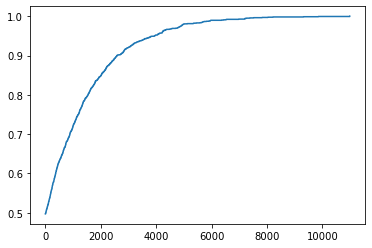

In [10]:
# plot the scores vs iterations
plt.plot(scores)
plt.show()